In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import tensorflow
tensorflow.keras.__version__
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd 
import datetime
import numpy as np

In [71]:
# import csv
df = pd.read_csv("Provider_Info.csv")
# drop columns not included in analysis
df = df.drop(columns=['Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Provider Phone Number', 'Provider SSA County Code',
       'Provider County Name', 
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid services',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 
       'Overall Rating Footnote', 
       'Health Inspection Rating Footnote',  'QM Rating Footnote',
        'Long-Stay QM Rating Footnote',
       'Short-Stay QM Rating Footnote','Staffing Rating Footnote', 
       'RN Staffing Rating Footnote', 'Reported Staffing Footnote',
       'Physical Therapist Staffing Footnote',
        'Rating Cycle 1 Standard Survey Health Date',
       'Rating Cycle 2 Standard Health Survey Date',
       'Rating Cycle 3 Standard Health Survey Date',
         'Location', 'Processing Date'
       ])
# reconsider encoding some of the dropped columns after initial analysis 
# Drop null columns/rows
df = df.dropna(axis='columns', how='all')
df = df.dropna()
df.tail()

,Ownership Type,Number of Certified Beds,Average Number of Residents Per Day,Provider Type,Cited for Abuse,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,...,Rating Cycle 3 Health Deficiency Score,Rating Cycle 3 Health Revisit Score,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
15483,Non profit - Church related,154,128.8,Medicare and Medicaid,False,4.0,3.0,5.0,4.0,5.0,...,20,0,20,35.333,0,3,0,0,0,0
15484,For profit - Corporation,90,75.0,Medicare and Medicaid,False,1.0,2.0,3.0,3.0,3.0,...,52,0,52,71.000,2,3,1,13328,0,1
15486,For profit - Partnership,125,90.4,Medicare and Medicaid,True,1.0,1.0,1.0,1.0,2.0,...,32,0,32,180.000,3,2,0,0,0,0
15487,For profit - Corporation,62,57.4,Medicare and Medicaid,False,1.0,1.0,2.0,2.0,2.0,...,48,0,48,128.000,0,12,1,124335,0,1
15489,Non profit - Corporation,71,65.4,Medicare and Medicaid,False,5.0,5.0,5.0,5.0,5.0,...,0,0,0,8.667,0,0,0,0,0,0


In [72]:
# list(df.columns.values)
df.shape

(12929, 54)

In [73]:
df.to_csv('df_export.csv')

In [74]:
df.columns

Index(['Ownership Type', 'Number of Certified Beds',
       'Average Number of Residents Per Day', 'Provider Type',
       'Cited for Abuse', 'Overall Rating', 'Health Inspection Rating',
       'QM Rating', 'Long-Stay QM Rating', 'Short-Stay QM Rating',
       'Staffing Rating', 'RN Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Case-Mix Nurse Aide Staffing Hours per Resident per Day',
       'Case-Mix LPN Staffing Hours per Resident per Day',
       'Case-Mix RN Staffing Hours per Resident per Day',
       'Case-Mix Total Nurse Staffing Hours per Resident per Day',
       'Adjusted Nurse Aide Staffing Hours per Resident per

In [75]:
#Explore data
df['Overall Rating'].value_counts()

4.0    2877
5.0    2696
2.0    2578
3.0    2393
1.0    2385
Name: Overall Rating, dtype: int64

In [76]:
df.groupby('Overall Rating').mean()

,Number of Certified Beds,Average Number of Residents Per Day,Cited for Abuse,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Rating Cycle 2 Number of Health Revisits,Rating Cycle 2 Health Revisit Score,Rating Cycle 2 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
Overall Rating,,,,,,,,,,,,,,,,,,,,,
1.0,126.301468,98.706247,0.122013,1.264570,2.548008,2.742138,2.566876,1.955556,1.932075,2.031845,...,1.057023,8.061216,129.200000,128.520006,2.171069,9.646541,1.012998,44715.039413,0.292662,1.305660
2.0,120.679984,96.791932,0.088441,1.845617,3.342901,3.395656,3.291311,2.638867,2.635764,2.187111,...,1.018231,4.275019,84.824282,84.837188,1.889449,6.253685,0.755237,24868.508534,0.128394,0.883631
3.0,115.169662,94.204388,0.036356,2.708316,3.519432,3.529043,3.470539,2.726285,2.716256,2.235587,...,0.959883,0.645215,47.796072,48.390708,1.308399,3.412453,0.402006,8804.463853,0.054325,0.456331
4.0,107.735836,89.031873,0.013208,3.445951,3.808481,3.806743,3.710810,3.191519,3.187000,2.357402,...,0.913799,0.560306,33.183525,33.136489,0.867918,2.013903,0.259298,4586.423705,0.029545,0.288843
5.0,100.284125,84.959050,0.000000,4.245920,4.598665,4.418398,4.433605,3.673591,3.695846,2.522535,...,0.802300,0.161721,21.205119,20.769855,0.554896,1.142433,0.162092,2591.984792,0.012240,0.174332


In [77]:
# df.groupby(['Overall Rating','Number of Certified Beds']).agg({'Overall Rating': 'count'})

In [78]:
#  df.groupby(['Total Weighted Health Survey Score', 'Adjusted RN Staffing Hours per Resident per Day']).agg({'Adjusted RN Staffing Hours per Resident per Day': 'mean'})

In [79]:
df['Cited for Abuse'].value_counts()

False    12285
True       644
Name: Cited for Abuse, dtype: int64

([<matplotlib.patches.Wedge at 0x124ddc382e8>,
 [Text(-1.0999995089056736, -0.0010394264172873889, '1'),
  Text(-0.23541178507721222, -1.0745144445035444, '2'),
  Text(0.9627151806242221, -0.5321461086916559, '3'),
  Text(0.8392412655350233, 0.7111076558603293, '4'),
  Text(-0.37564509746423114, 1.2445443988669465, '5')],
 [Text(-0.5999997321303674, -0.0005669598639749394, '22.3%'),
  Text(-0.12840642822393392, -0.5860987879110242, '20.9%'),
  Text(0.5251173712495756, -0.2902615138318123, '19.9%'),
  Text(0.45776796301910355, 0.3878769031965432, '18.5%'),
  Text(-0.23116621382414224, 0.765873476225813, '18.4%')])

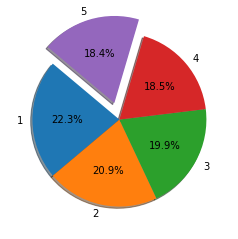

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

labels = ['1','2','3','4','5']
sizes = df['Overall Rating'].value_counts()
explode = (0,0,0,0,0.2)
plt.pie(sizes, explode=explode, labels=labels,autopct="%1.1f%%", shadow=True, startangle=140)

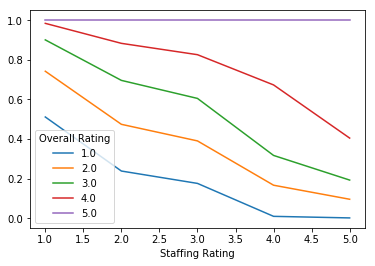

In [81]:
table=pd.crosstab(df['Staffing Rating'],df['Overall Rating'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='line', stacked=True)

In [82]:
# num_bins = 5

# df.hist(bins=num_bins, figsize=(20,15))
# # plt.savefig("snf_histogram_plots")
# plt.show()

In [83]:
# column names that need to be converted to dummy variables for categorical encoding
to_dummify = [
 'Ownership Type',
 'Provider Type',
 'Cited for Abuse']


for dummy in to_dummify:
    df = pd.concat([df.drop(dummy, axis=1), pd.get_dummies(df[dummy], drop_first=True,
                prefix=dummy)], axis=1)
df.head()

,Number of Certified Beds,Average Number of Residents Per Day,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Ownership Type_Government - City/county,Ownership Type_Government - County,Ownership Type_Government - Federal,Ownership Type_Government - Hospital district,Ownership Type_Government - State,Ownership Type_Non profit - Church related,Ownership Type_Non profit - Corporation,Ownership Type_Non profit - Other,Provider Type_Medicare and Medicaid,Cited for Abuse_True
1,100,78.9,5.0,5.0,4.0,3.0,5.0,3.0,3.0,2.62088,...,0,0,0,0,0,0,0,0,1,0
4,79,78.2,5.0,5.0,5.0,5.0,3.0,2.0,1.0,2.38684,...,0,0,0,0,0,0,0,0,1,0
5,50,38.8,2.0,1.0,4.0,5.0,1.0,4.0,3.0,2.58972,...,0,0,0,0,0,0,0,0,1,1
6,72,54.2,4.0,4.0,4.0,4.0,3.0,3.0,2.0,2.77276,...,0,0,0,0,0,0,0,0,1,0
7,134,128.1,4.0,3.0,5.0,5.0,5.0,3.0,3.0,2.54910,...,0,0,0,0,0,0,0,0,1,0


In [94]:
# change values to numeric for model
df = df.replace('.', np.nan)
df.loc[:, df.dtypes == object]
df = df.apply(pd.to_numeric)
df.head()

,Number of Certified Beds,Average Number of Residents Per Day,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Ownership Type_Government - City/county,Ownership Type_Government - County,Ownership Type_Government - Federal,Ownership Type_Government - Hospital district,Ownership Type_Government - State,Ownership Type_Non profit - Church related,Ownership Type_Non profit - Corporation,Ownership Type_Non profit - Other,Provider Type_Medicare and Medicaid,Cited for Abuse_True
1,100,78.9,5.0,5.0,4.0,3.0,5.0,3.0,3.0,2.62088,...,0,0,0,0,0,0,0,0,1,0
4,79,78.2,5.0,5.0,5.0,5.0,3.0,2.0,1.0,2.38684,...,0,0,0,0,0,0,0,0,1,0
5,50,38.8,2.0,1.0,4.0,5.0,1.0,4.0,3.0,2.58972,...,0,0,0,0,0,0,0,0,1,1
6,72,54.2,4.0,4.0,4.0,4.0,3.0,3.0,2.0,2.77276,...,0,0,0,0,0,0,0,0,1,0
7,134,128.1,4.0,3.0,5.0,5.0,5.0,3.0,3.0,2.54910,...,0,0,0,0,0,0,0,0,1,0


In [104]:
df = df.dropna(axis=1)
df.shape

(12929, 58)

In [105]:
df['Number of Certified Beds'].dtype

dtype('int64')

In [106]:
X = df.drop('Cited for Abuse_True', axis=1)

# save column names of X to a list for later use
feature_names = X.columns.tolist()
# feature_names

In [107]:
# Convert X, y to arrays
X = df.drop('Cited for Abuse_True', axis=1).values
y = df['Cited for Abuse_True'].values
print(X.shape, y.shape)

(12929, 57) (12929,)


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    random_state=1, stratify=y)

In [109]:
##data pre-processing

In [110]:
# Create a StandardScater model and fit it to the training data
X_scaler = MinMaxScaler().fit(X_train)
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train, dtype=int)
y_test_categorical = to_categorical(encoded_y_test, dtype=int)


In [111]:
##random forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
# rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train_categorical)
train_score = rf.score(X_train_scaled, y_train_categorical)
train_score

C:\Users\h4wth\Anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9927805280528053

In [113]:
test_score = rf.score(X_test_scaled, y_test_categorical)
print('Random Forest Accuracy: {:.3f}'.format(test_score))

Random Forest Accuracy: 0.945


In [116]:
# save rf classifier as pickle file
import pickle
output = open('Output/rf_model_trained.pkl', 'wb')
pickle.dump(rf, output)
output.close()

In [117]:
##interpret model for feature importance
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
# We can evaluate the features by their importance
rf_feature_importance = dict(zip(feature_names,rf.feature_importances_))
rf_feature_importance

{'Number of Certified Beds': 0.026747708537745947,
 'Average Number of Residents Per Day': 0.033342358125584365,
 'Overall Rating': 0.005725780223158798,
 'Health Inspection Rating': 0.027454351491866907,
 'QM Rating': 0.010992284384945926,
 'Long-Stay QM Rating': 0.00943103006823942,
 'Short-Stay QM Rating': 0.01219861308372279,
 'Staffing Rating': 0.00939368539732824,
 'RN Staffing Rating': 0.0078909736976309,
 'Reported Nurse Aide Staffing Hours per Resident per Day': 0.01912022059331423,
 'Reported LPN Staffing Hours per Resident per Day': 0.028533147495101142,
 'Reported RN Staffing Hours per Resident per Day': 0.029933898385696787,
 'Reported Licensed Staffing Hours per Resident per Day': 0.023171187752975015,
 'Reported Total Nurse Staffing Hours per Resident per Day': 0.021187794174120818,
 'Reported Physical Therapist Staffing Hours per Resident Per Day': 0.0220502617493479,
 'Case-Mix Nurse Aide Staffing Hours per Resident per Day': 0.026304811025177947,
 'Case-Mix LPN Staffi

In [118]:
rf_feature_importance_df = pd.DataFrame.from_dict(rf_feature_importance, orient='index', columns=['Importance'])
rf_feature_importance_df.reset_index(level=0, inplace=True)
rf_feature_importance_df = rf_feature_importance_df.rename(columns={"index": "Feature"})
rf_feature_importance_df

rf_feature_importance_df.to_csv('Output/rf_feature.csv',index=False)

In [121]:
rf_feature_importance_df = rf_feature_importance_df.sort_values("Importance", ascending=False)
rf_feature_importance_df

,Feature,Importance
29,Rating Cycle 1 Total Health Score,0.069698
37,Total Weighted Health Survey Score,0.062132
26,Rating Cycle 1 Health Deficiency Score,0.055837
19,Adjusted Nurse Aide Staffing Hours per Residen...,0.034545
1,Average Number of Residents Per Day,0.033342
23,Rating Cycle 1 Total Number of Health Deficien...,0.033146
38,Number of Facility Reported Incidents,0.033140
11,Reported RN Staffing Hours per Resident per Day,0.029934
10,Reported LPN Staffing Hours per Resident per Day,0.028533
16,Case-Mix LPN Staffing Hours per Resident per Day,0.027826


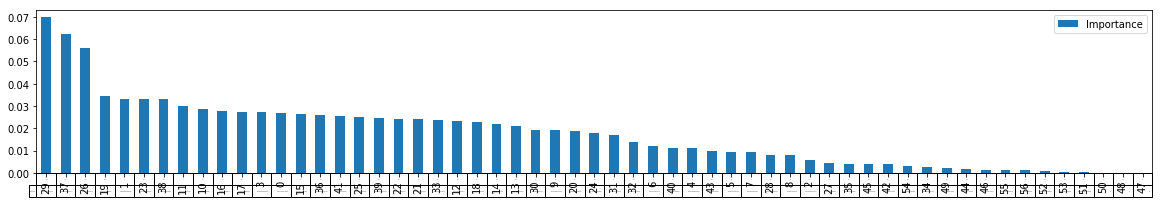

In [122]:
rf_feature_importance_df.plot(kind="bar", figsize=(20,3), table=True)

In [128]:
### Interpret model: Visualizing a Single Decision Tree
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot
# # Pull out one tree from the forest
# tree = rf.estimators_[5]
# # Export the image to a dot file
# export_graphviz(tree, out_file = 'Output/tree.dot', feature_names = feature_names, rounded = True, precision = 1)
# # Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')
# # Write graph to a png file
# graph.write_png('tree.png')


In [129]:
##precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical, rf.predict(X_test_scaled)))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3072
           1       0.50      0.12      0.20       161

   micro avg       0.95      0.94      0.95      3233
   macro avg       0.73      0.56      0.59      3233
weighted avg       0.94      0.94      0.93      3233
 samples avg       0.94      0.94      0.94      3233



C:\Users\h4wth\Anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


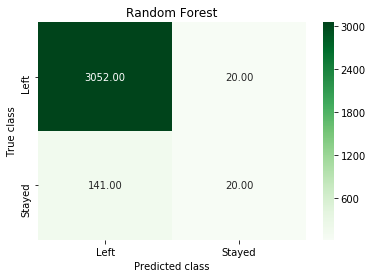

In [130]:
y_pred = rf.predict(X_test_scaled)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
# confusion_matrix must be a list of predictions, not OHEs (one hot encodings). Call argmax on your y_test and y_pred
forest_cm = metrics.confusion_matrix(y_test_categorical.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"],
            cmap ='Greens' )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('Output/random_forest')

In [132]:
##Neural Network
# determine input_dim for model
input_dim = len(list(df.columns.values))-1

# create model
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=input_dim))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [133]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 348       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 14        
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


In [134]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [135]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.2525 - acc: 0.9469
Epoch 2/100
 - 0s - loss: 0.1713 - acc: 0.9500
Epoch 3/100
 - 0s - loss: 0.1553 - acc: 0.9502
Epoch 4/100
 - 0s - loss: 0.1502 - acc: 0.9502
Epoch 5/100
 - 0s - loss: 0.1479 - acc: 0.9515
Epoch 6/100
 - 0s - loss: 0.1462 - acc: 0.9508
Epoch 7/100
 - 0s - loss: 0.1454 - acc: 0.9514
Epoch 8/100
 - 1s - loss: 0.1441 - acc: 0.9512
Epoch 9/100
 - 0s - loss: 0.1434 - acc: 0.9519
Epoch 10/100
 - 0s - loss: 0.1427 - acc: 0.9521
Epoch 11/100
 - 0s - loss: 0.1429 - acc: 0.9528
Epoch 12/100
 - 0s - loss: 0.1417 - acc: 0.9520
Epoch 13/100
 - 1s - loss: 0.1417 - acc: 0.9519
Epoch 14/100
 - 0s - loss: 0.1414 - acc: 0.9526
Epoch 15/100
 - 0s - loss: 0.1414 - acc: 0.9522
Epoch 16/100
 - 0s - loss: 0.1411 - acc: 0.9522
Epoch 17/100
 - 0s - loss: 0.1406 - acc: 0.9525
Epoch 18/100
 - 0s - loss: 0.1406 - acc: 0.9522
Epoch 19/100
 - 0s - loss: 0.1405 - acc: 0.9527
Epoch 20/100
 - 0s - loss: 0.1403 - acc: 0.9518
E

In [ ]:
# Save the model
model.save("Output/turnover_neural_model_trained.h5")

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
turnover_neural_model = load_model("Output/turnover_neural_model_trained.h5")

In [136]:
#Evaluate Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.1260 - acc: 0.9542
Normal Neural Network - Loss: 0.1260106517200753, Accuracy: 0.9542220830917358


In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical.argmax(axis=1), model.predict(X_test_scaled).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3072
           1       0.68      0.16      0.25       161

   micro avg       0.95      0.95      0.95      3233
   macro avg       0.82      0.58      0.61      3233
weighted avg       0.94      0.95      0.94      3233



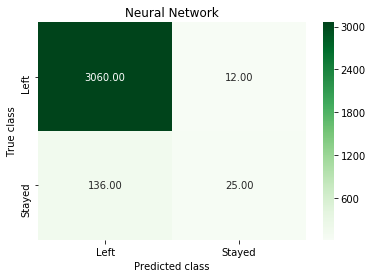

In [138]:
nn_y_pred = model.predict(X_test_scaled)

# confusion_matrix must be a list of predictions, not OHEs (one hot encodings). Call argmax on your y_test and y_pred
nn_cm = metrics.confusion_matrix(y_test_categorical.argmax(axis=1),nn_y_pred.argmax(axis=1))
sns.heatmap(nn_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"],
            cmap ='Greens' )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Neural Network')
plt.savefig('Output/neural_network')